In [1]:
library(tidyverse)
library(quantmod)
library(PerformanceAnalytics)
library(RColorBrewer)
library(tseries)
library(lubridate)
library(Quandl)
Quandl.api_key("zrcB2Ejv9UmvhPCusy2_")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: xts



Loading required package: zoo




Attaching package: ‘zoo’




The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is not affected. It's protected by R's namespace mechanism #
# Set `options(xts.warn_dplyr_breaks_lag = FALSE)` to suppress this warning.  #
#                                      


Attaching package: ‘xts’




The following objects are masked from ‘package:dplyr’:

    first, last




Loading required package: TTR



Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 




Attaching package: ‘PerformanceAnalytics’




The following object is masked from ‘package:graphics’:

    legend




# Getting Data(stock price info)

In [2]:
msft <- getSymbols("MSFT", auto.assign = F)
head(msft)
tsla <- getSymbols("TSLA", auto.assign = F)

tsla_daily_return <- dailyReturn(tsla$TSLA.Adjusted)
head(tsla)
head(tsla_daily_return)

           MSFT.Open MSFT.High MSFT.Low MSFT.Close MSFT.Volume MSFT.Adjusted
2007-01-03     29.91     30.25    29.40      29.86    76935100      21.35890
2007-01-04     29.70     29.97    29.44      29.81    45774500      21.32314
2007-01-05     29.63     29.75    29.45      29.64    44607200      21.20153
2007-01-08     29.65     30.10    29.53      29.93    50220200      21.40898
2007-01-09     30.00     30.18    29.73      29.96    44636600      21.43043
2007-01-10     29.80     29.89    29.43      29.66    55017400      21.21584

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2010-06-29  1.266667  1.666667 1.169333   1.592667   281494500      1.592667
2010-06-30  1.719333  2.028000 1.553333   1.588667   257806500      1.588667
2010-07-01  1.666667  1.728000 1.351333   1.464000   123282000      1.464000
2010-07-02  1.533333  1.540000 1.247333   1.280000    77097000      1.280000
2010-07-06  1.333333  1.333333 1.055333   1.074000   103003500      1.074000
2010-07-07  1.093333  1.108667 0.998667   1.053333   103825500      1.053333

           daily.returns
2010-06-29   0.000000000
2010-06-30  -0.002511478
2010-07-01  -0.078472736
2010-07-02  -0.125683072
2010-07-06  -0.160937481
2010-07-07  -0.019242977

# Charting 

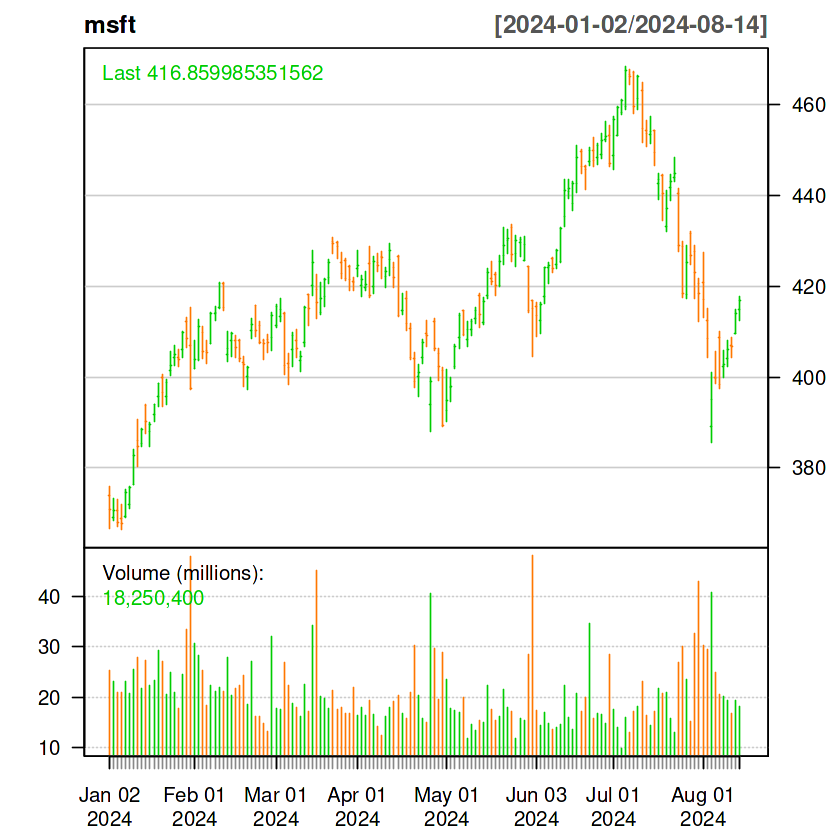

In [3]:
# bar chart
chartSeries(msft,
           type = "bar",
           subset = "2024",
           theme = chartTheme("white"))

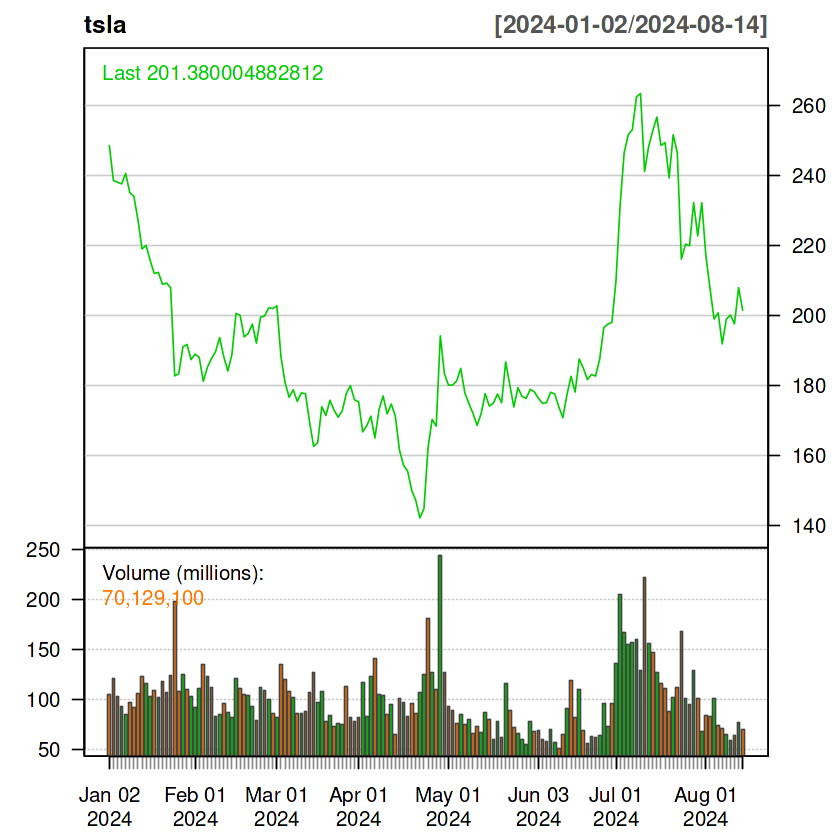

In [4]:
# line
chartSeries(tsla,
           type = "line",
           subset = "2024",
           theme = chartTheme("white"))

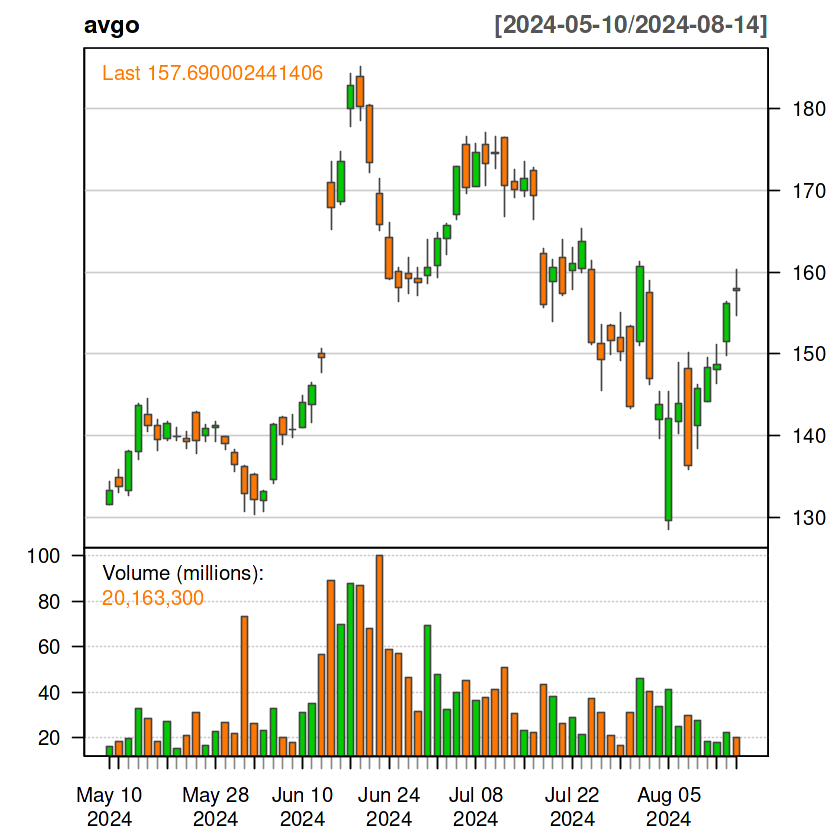

In [5]:
# candlestick with specific time
avgo <- getSymbols("AVGO", auto.assign = F)
chartSeries(avgo,
           type = "candlestick",
           subset = "2024-05-10::2024-6-10",
           theme = chartTheme("white"))

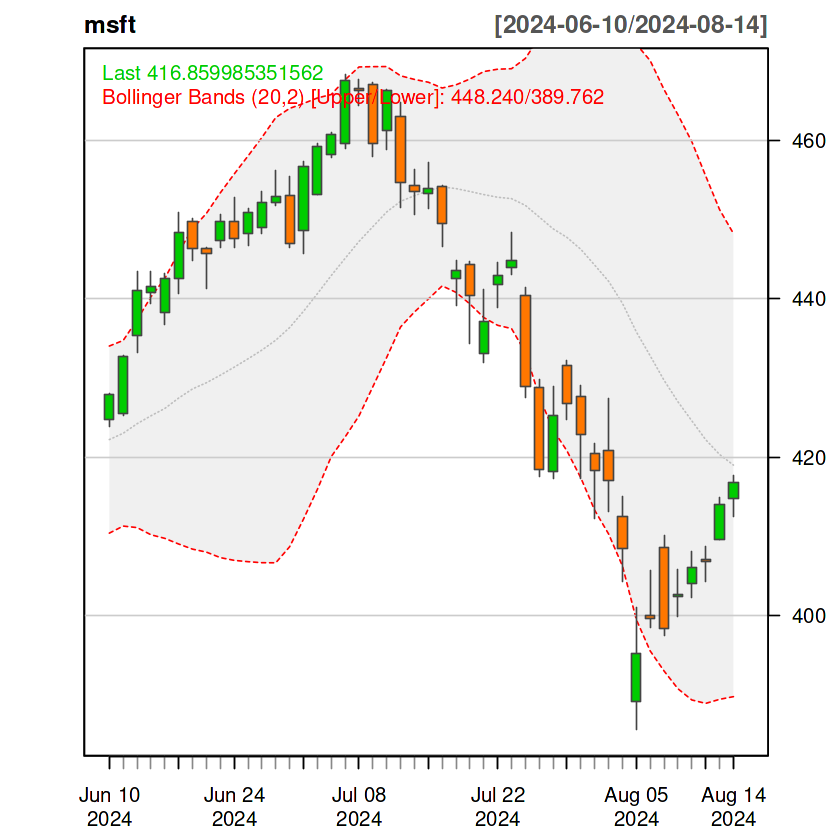

In [6]:
chartSeries(msft,
           subset = "2024-06-10::2024-8-14",
           TA = "addBBands(n=20, sd=2)",
           theme = chartTheme("white"))

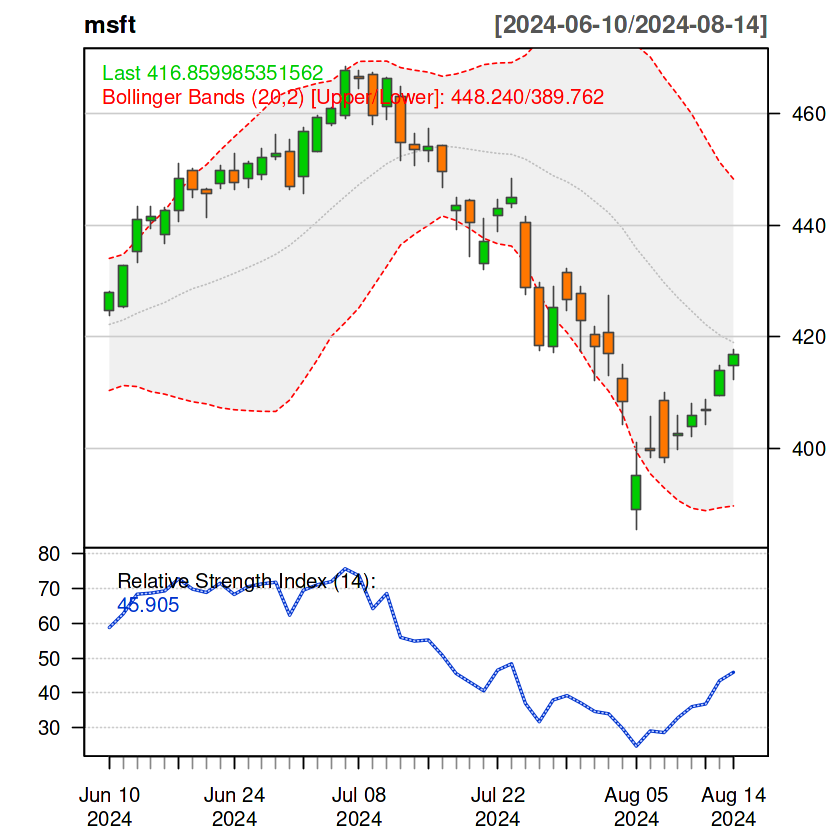

In [7]:
# add RSI to the mix
chartSeries(msft,
            subset = "2024-06-10::2024-8-14",
           type = "candlestick",
           TA = c(addBBands(n = 20, sd = 2), addRSI()),
           theme = chartTheme("white"))

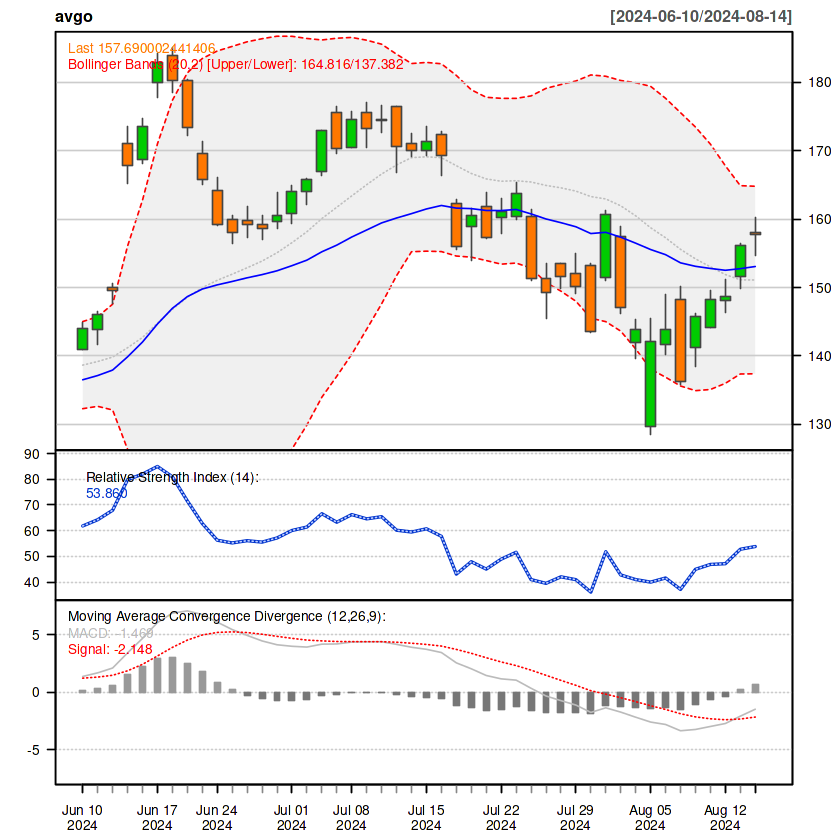

In [8]:
# buy or sell
# exponential moving avergae by num day of information
# also addMACD
chartSeries(avgo,
            subset = "2024-06-10::2024-8-14",
           type = "candlestick",
           TA = c(addBBands(n = 20, sd = 2), addRSI(), addEMA(n=30), addMACD()),
           theme = chartTheme("white"))